In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
url_train = 'https://raw.githubusercontent.com/kevinchow999/CSCIBigDataLab/Lab4(KNN_Classifier)/train.csv'
url_test = 'https://raw.githubusercontent.com/kevinchow999/CSCIBigDataLab/Lab4(KNN_Classifier)/test.csv'
train_data = pd.read_csv(url_train)
test_data = pd.read_csv(url_test)

In [ ]:
def custom_standard_scaler(X):
    X = X.select_dtypes(include=[np.number])

    num_samples, num_features = X.shape

    scaled_X = np.zeros((num_samples, num_features))

    for i in range(num_features):
        feature_values = X.iloc[:, i]
        if not feature_values.isnull().all():
            mean = feature_values.mean()
            std = feature_values.std()
            if std != 0:
                scaled_X[:, i] = (feature_values - mean) / std
            else:
                scaled_X[:, i] = feature_values
        else:
            scaled_X[:, i] = feature_values

    return scaled_X

In [ ]:
y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])

X_sc = custom_standard_scaler(X)

X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size=0.25, random_state=24)

Best K value: 14 with accuracy: 0.8071748878923767


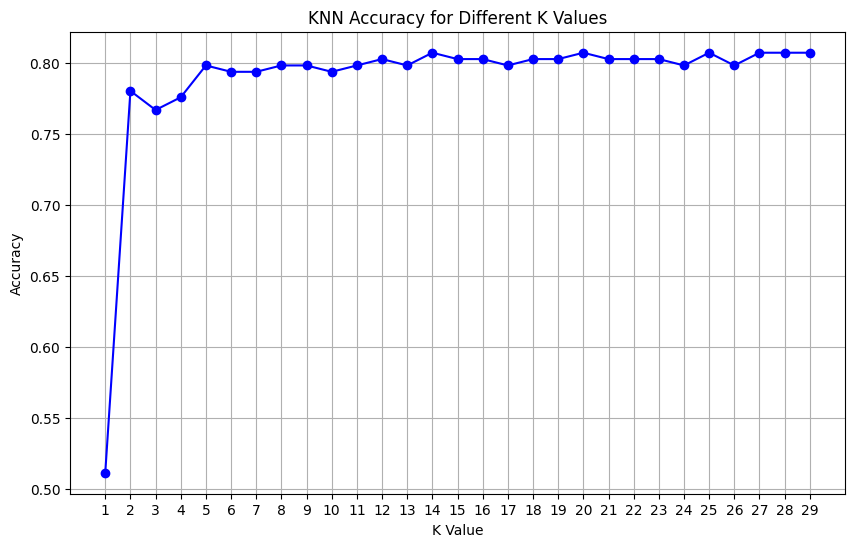

In [ ]:
k_values = []
accuracies = []

k_range = range(1, 30)

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)

    accuracy = np.mean(y_pred == y_test)
    k_values.append(k)
    accuracies.append(accuracy)

plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b')
plt.title('KNN Accuracy for Different K Values')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)

best_k = k_values[np.argmax(accuracies)]
print(f"Best K value: {best_k} with accuracy: {max(accuracies)}")

plt.show()

In [ ]:
best_knn = KNeighborsClassifier(n_neighbors=best_k)

cv_scores = cross_val_score(best_knn, X_train, y_train, cv=5)

mean_cv_score = np.mean(cv_scores)
std_cv_score = np.std(cv_scores)

print(f"Mean Cross-Validation Score: {mean_cv_score}")
print(f"Standard Deviation of Cross-Validation Score: {std_cv_score}")

Mean Cross-Validation Score: 0.7859387274155538
Standard Deviation of Cross-Validation Score: 0.02568529107791752


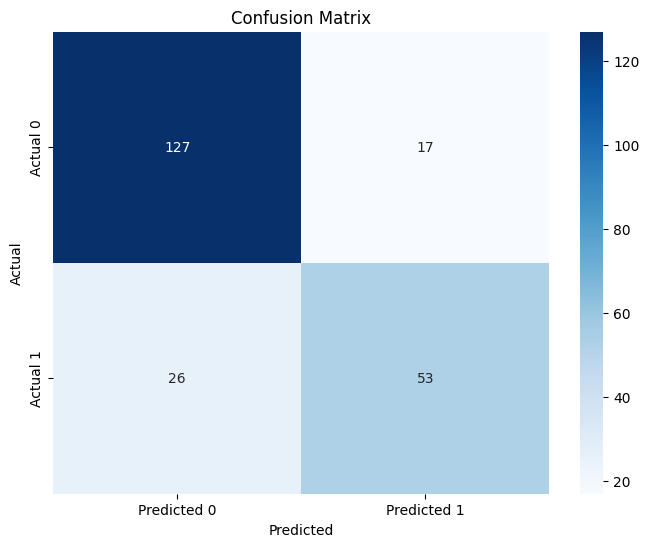

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

I believe that this model is accurate. The best KNN value was at 14 and from the K-Accuracy graph, it seeems that the model is able to make the correct predict 80% of the time. The model is skewed by the inital thre K values of 1,2, and 3 which drops the accuracy by a bit. This is shown in the mean-cross-validation number which shows a 79% accuracy. Additionally the std of the cross-validation score is .027. This means that the model is extremely stable and consistent with the results as shown in the K-graph. Overall, this model is accurate, stable, and consistent.